In [24]:
import os
from numpy import loadtxt
import pandas as pd
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [25]:
def warmUpExercise():
    A = np.eye(5)
    return A

In [26]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [27]:
data = pd.read_csv('C:\\Users\\Mohamed Gouda\\Desktop\\house_prices_data_training_data.csv')

In [28]:
data.dropna(inplace=True)
data.shape

(17999, 21)

In [29]:
del data['id']
del data['date']
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
5,1230000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3.0,11.0,3890.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0
6,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819.0
7,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,3.0,7.0,1060.0,0.0,1963.0,0.0,98198.0,47.4095,-122.315,1650.0,9711.0
8,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3.0,7.0,1050.0,730.0,1960.0,0.0,98146.0,47.5123,-122.337,1780.0,8113.0
9,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003.0,0.0,98038.0,47.3684,-122.031,2390.0,7570.0


In [30]:
dfcorrnew=data.corr()
dfcorrnew.drop(dfcorrnew.index[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]] , inplace=True)
dfcorrnew.head()
dnew=dfcorrnew.iloc[0].to_numpy()
#print(dnew)
result = np.where(dnew < .3)
print(result)
#these are the indexes will be dropped 4,  5,  6,  8, 12, 13, 14, 16, 18 because correlation is less than 0.3



(array([ 4,  5,  6,  8, 12, 13, 14, 16, 18], dtype=int64),)


In [31]:
data.drop(data.columns[result], axis = 1, inplace = True)
data.head()


,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3.0,1.00,1180.0,0.0,7.0,1180.0,0.0,47.5112,1340.0
1,538000.0,3.0,2.25,2570.0,0.0,7.0,2170.0,400.0,47.7210,1690.0
2,180000.0,2.0,1.00,770.0,0.0,6.0,770.0,0.0,47.7379,2720.0
3,604000.0,4.0,3.00,1960.0,0.0,7.0,1050.0,910.0,47.5208,1360.0
4,510000.0,3.0,2.00,1680.0,0.0,8.0,1680.0,0.0,47.6168,1800.0


In [32]:
#lets do normalization
X=data.iloc[:,1:]
y=data.iloc[:,0] 
m = y.size

print(m)

17999


In [33]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma   
    # ================================================================
    return X_norm, mu, sigma

In [37]:
data_norm, mu, sigma = featureNormalize(data)
print('Computed mean:', mu)
print('Computed standard deviation:', sigma)
#print(data_norm)
data_norm = np.concatenate([np.ones((m, 1)), data_norm], axis=1)
data_norm=pd.DataFrame(data_norm)
data_norm.head()

Computed mean: price            533074.250347
bedrooms              3.362965
bathrooms             2.061601
sqft_living        2051.822323
view                  0.242458
grade                 7.592366
sqft_above         1749.742319
sqft_basement       302.080004
lat                  47.560211
sqft_living15      1973.236735
dtype: float64
Computed standard deviation: price            364402.027528
bedrooms              0.934006
bathrooms             0.758611
sqft_living         902.719076
view                  0.778835
grade                 1.169462
sqft_above          805.404988
sqft_basement       449.430523
lat                   0.139640
sqft_living15       673.168169
dtype: float64


,0,1,2,3,4,5,6,7,8,9,10
0,1.0,-0.853931,-0.388610,-1.399400,-0.965774,-0.311308,-0.506529,-0.707399,-0.672139,-0.350979,-0.940681
1,1.0,0.013517,-0.388610,0.248348,0.574019,-0.311308,-0.506529,0.521797,0.217876,1.151452,-0.420752
2,1.0,-0.968914,-1.459267,-1.399400,-1.419957,-0.311308,-1.361623,-1.216459,-0.672139,1.272477,1.109326
3,1.0,0.194636,0.682046,1.236996,-0.101717,-0.311308,-0.506529,-0.868808,1.352645,-0.282231,-0.910971
4,1.0,-0.063321,-0.388610,-0.081202,-0.411892,-0.311308,0.348565,-0.086593,-0.672139,0.405249,-0.257345


In [38]:
def train_validate_test_split(df, train_percent=.6, validate_percent=0.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train,validate,test
train , validate , test =train_validate_test_split(data_norm, train_percent=.6, validate_percent=0.2, seed=None)
print(validate.shape)
print(train.shape)
print(test.shape)

(3599, 11)
(10799, 11)
(3601, 11)


In [40]:
X_train=train.iloc[:,2:]
y_train=train.iloc[:,1] 
y_train.shape
y_train.head()

13647   -0.227974
5510    -0.577862
7953     1.061810
6766    -0.502396
12410    0.924599
Name: 1, dtype: float64

In [93]:
X_train.head(5)

,2,3,4,5,6,7,8,9,10
13647,0.682046,0.577897,0.208457,-0.311308,-0.506529,0.112065,0.217876,-0.346683,0.425991
5510,-0.388610,-1.399400,-0.987929,-0.311308,-0.506529,-0.732231,-0.672139,1.308283,-1.208074
7953,-0.388610,1.896095,0.828805,-0.311308,1.203659,1.304012,-0.672139,1.069097,0.663673
6766,-0.388610,-1.399400,-1.154094,-0.311308,-0.506529,-0.918472,-0.672139,1.230225,-0.970392
12410,1.752702,0.248348,0.950659,-0.311308,1.203659,1.440589,-0.672139,0.022122,1.139037


In [95]:
X_val=validate.iloc[:,2:]
y_val=validate.iloc[:,1] 
X_val.head()

,2,3,4,5,6,7,8,9,10
17237,1.752702,-1.399400,-0.699910,-0.311308,0.348565,-0.409412,-0.672139,0.146728,-0.821840
3442,-0.388610,0.577897,-0.552578,-0.311308,0.348565,-0.244278,-0.672139,1.036155,-0.689630
14722,-1.459267,-1.399400,-1.530733,-0.311308,-1.361623,-1.340620,-0.672139,-0.339521,-1.594307
6461,-1.459267,-1.399400,-1.198404,-0.311308,-1.361623,-0.968137,-0.672139,0.108773,-1.178363
14513,2.823359,3.214294,3.797613,3.540597,1.203659,3.327838,1.664150,0.504790,1.480705


In [139]:
X_test=test.iloc[:,2:]
y_test=test.iloc[:,1] 

In [16]:
def computeCostMulti(X, y, theta):
    m = y.shape[0] 
    J = 0    
    # ======================= YOUR CODE HERE ===========================
    h = np.dot(X, theta)    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    # ==================================================================
    return J

In [17]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()   
    J_history = []   
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)       
        # =================================================================
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta computed from gradient descent: 2    0.296056
Name: 1, dtype: float64
[0.45313407211037954, 0.4523314207675475, 0.4515438972146151, 0.450771216333979, 0.45001309838172526, 0.4492692688863505, 0.44853945854939054, 0.44782340314792385, 0.4471208434389101, 0.446431525065334, 0.44575519846411654, 0.4450916187757624, 0.4444405457557105, 0.4438017436873546, 0.44317498129670413, 0.44256003166865276, 0.4419566721648255, 0.44136468434297355, 0.44078385387788943, 0.44021397048381145, 0.43965482783829113, 0.4391062235074961, 0.43856795887291944, 0.4380398390594723, 0.43752167286492943, 0.43701327269070683, 0.43651445447394227, 0.4360250376208565, 0.43554484494137097, 0.43507370258495737, 0.4346114399776953, 0.43415788976051845, 0.4337128877286224, 0.43327627277201564, 0.432847886817191, 0.4324275747698961, 0.43201518445898196, 0.4316105665813117, 0.43121357464770493, 0.4308240649299035, 0.4304418964085349, 0.43006693072205726, 0.429699032116667, 0.42933806739714936, 0.42898390587865637, 0.4

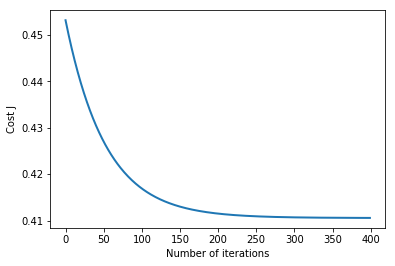

In [189]:
alpha = 0.01
num_iters = 400
theta_one = np.zeros(1)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:1], y_train, theta_one, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
thetaone_trained=theta
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# ======================= YOUR CODE HERE ===========================
normalize_test_data = None
normalize_test_data = None
price = 0
# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('thetaone_trained',thetaone_trained)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2    0.093942
3    0.419091
Name: 1, dtype: float64
[0.45098462942554896, 0.4481000178745727, 0.4452959346367947, 0.4425700755919166, 0.43992020306890345, 0.43734414392487925, 0.43483978767960696, 0.43240508470394284, 0.43003804446070437, 0.42773673379643373, 0.4254992752825848, 0.42332384560470315, 0.4212086739982101, 0.41915204072944184, 0.4171522756206339, 0.41520775661758064, 0.4133169083987319, 0.41147820102453175, 0.4096901486258294, 0.40795130813023717, 0.40626027802533343, 0.40461569715764567, 0.4030162435663782, 0.40146063335087934, 0.39994761957087066, 0.3984759911784913, 0.3970445719812362, 0.39565221963489405, 0.39429782466561686, 0.392980309520279, 0.3916986276443057, 0.3904517625861764, 0.3892387271278329, 0.38805856244023895, 0.3869103372633679, 0.38579314710990703, 0.38470611349199674, 0.38364838317033406, 0.38261912742499576, 0.38161754134735176, 0.3806428431524587, 0.3796942735113407, 0.3787710949025824, 0.37787259098267445, 0.376

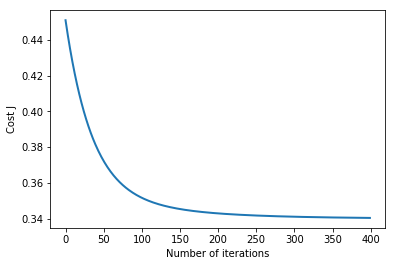

In [190]:
alpha = 0.01
num_iters = 400
theta_two = np.zeros(2)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:2], y_train, theta_two, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
thetatwo_trained=theta
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# ======================= YOUR CODE HERE ===========================
normalize_test_data = None
normalize_test_data = None
price = 0
# ===================================================================
print(J_history)
print('J =',J_history[-1])
print(thetatwo_trained)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2   -0.066506
3    0.115313
4    0.577459
Name: 1, dtype: float64
[0.44693957830916897, 0.4402081700837713, 0.4337461495201467, 0.427542245222651, 0.4215856610844077, 0.4158660562157174, 0.41037352572035746, 0.40509858228395007, 0.4000321385400928, 0.3951654901813933, 0.3904902997839408, 0.38599858131507225, 0.3816826852955696, 0.3775352845886377, 0.37354936078918755, 0.36971819118806176, 0.36603533628691465, 0.36249462784048403, 0.35909015740397476, 0.35581626536421507, 0.3526675304341477, 0.3496387595910841, 0.34672497843997213, 0.343921421983724, 0.34122352578340814, 0.33862691749183355, 0.3361274087447544, 0.3337209873945854, 0.33140381007216035, 0.3291721950626736, 0.32702261548253325, 0.3249516927444139, 0.3229561902983327, 0.32103300763709014, 0.3191791745549056, 0.31739184564855255, 0.3156682950507494, 0.3140059113859931, 0.3124021929394399, 0.3108547430298323, 0.30936126557785304, 0.30791956086164984, 0.306527521451624, 0.3051831283169108,

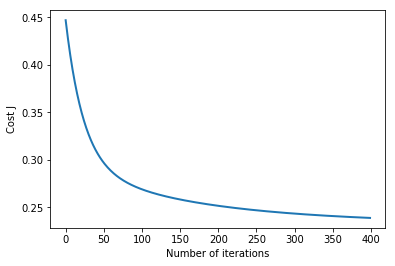

In [191]:
alpha = 0.01
num_iters = 400
theta_three = np.zeros(3)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:3], y_train, theta_three, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
thetathree_trained=theta
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# ======================= YOUR CODE HERE ===========================
normalize_test_data = None
normalize_test_data = None
price = 0
# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2   -0.046601
3    0.103356
4    0.512030
5    0.240919
Name: 1, dtype: float64
[0.4454636962932064, 0.4373276675281342, 0.42952886591892764, 0.422052763609686, 0.41488546557093864, 0.4080136819260529, 0.40142470148965104, 0.3951063664649228, 0.38904704824904895, 0.3832356242981724, 0.37766145600548906, 0.37231436754805947, 0.36718462565989196, 0.3622629202907092, 0.35754034611158525, 0.3530083848303459, 0.3486588882812496, 0.34448406225502115, 0.34047645103679836, 0.33662892262097305, 0.3329346545732688, 0.3293871205116951, 0.32598007717926397, 0.32270755208254076, 0.3195638316712382, 0.31654345003515066, 0.31364117809576225, 0.31085201327085693, 0.30817116959140967, 0.3055940682509439, 0.3031163285684097, 0.3007337593464689, 0.2984423506078649, 0.29623826569331535, 0.29411783370509215, 0.2920775422811465, 0.2901140306852997, 0.2882240831996575, 0.28640462280600876, 0.2846527051435535, 0.2829655127308553, 0.28134034944044867, 0.27977463521503504, 

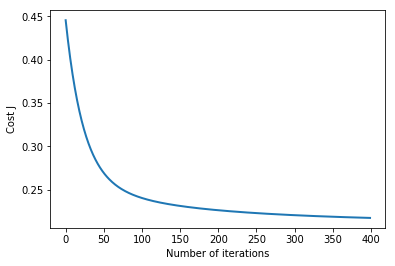

In [192]:
alpha = 0.01
num_iters = 400
theta_four = np.zeros(4)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:4], y_train, theta_four, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
thetatfour_trained=theta
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# ======================= YOUR CODE HERE ===========================
normalize_test_data = None
normalize_test_data = None
price = 0
# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2   -0.029895
3    0.015560
4    0.354396
5    0.218214
6    0.307461
Name: 1, dtype: float64
[0.4416953086487026, 0.430093191640769, 0.4191099003501611, 0.40871152554915013, 0.39886602964915757, 0.38954314317052124, 0.38071426694294136, 0.37235237971932844, 0.36443195090334396, 0.3569288581075173, 0.34982030927449986, 0.3430847691088242, 0.33670188958052255, 0.3306524442751752, 0.3249182663774388, 0.3194821900868942, 0.31432799527619604, 0.30944035521201996, 0.3048047871692499, 0.30040760577822817, 0.29623587895376685, 0.2922773862629905, 0.2885205795969969, 0.28495454601879766, 0.28156897266705955, 0.278354113601842, 0.2753007584848225, 0.2724002029924589, 0.26964422086615514, 0.26702503750881285, 0.2645353050421649, 0.26216807874402953, 0.2599167947890974, 0.25777524922109735, 0.2557375780881753, 0.253798238677103, 0.25195199178548927, 0.25019388497454087, 0.2485192367480968, 0.24692362160666723, 0.24540285592804453, 0.24395298462873782, 0.24257

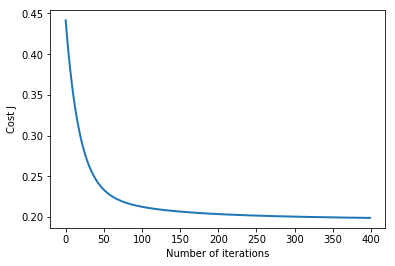

In [193]:
alpha = 0.01
num_iters = 400
theta_five = np.zeros(5)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:5], y_train, theta_five, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
thetatfive_trained=theta
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# ======================= YOUR CODE HERE ===========================
normalize_test_data = None
normalize_test_data = None
price = 0
# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2   -0.030005
3    0.006618
4    0.301828
5    0.227659
6    0.277134
7    0.089568
Name: 1, dtype: float64
[0.43878244861126636, 0.42463051943171276, 0.4114264431090262, 0.3991051373768371, 0.3876060148799813, 0.376872672273848, 0.3668526008360959, 0.3574969171020685, 0.34876011213825797, 0.34059981816406004, 0.3329765913213129, 0.32585370947419523, 0.3191969839993818, 0.3129745845983381, 0.30715687623062654, 0.30171626732945933, 0.29662706851877635, 0.29186536110515526, 0.2874088746681472, 0.2832368731194426, 0.2793300486448394, 0.27567042298354044, 0.27224125553705364, 0.2690269578351074, 0.2660130139186913, 0.26318590623078053, 0.26053304663362964, 0.2580427121979005, 0.2557039854334327, 0.25350669865431813, 0.25144138219220713, 0.2494992161915698, 0.24767198573906635, 0.2459520390963253, 0.2443322488213993, 0.24280597557902334, 0.241367034453633, 0.24000966359197543, 0.23872849501412732, 0.23751852744288882, 0.23637510101190523, 0.235293873722

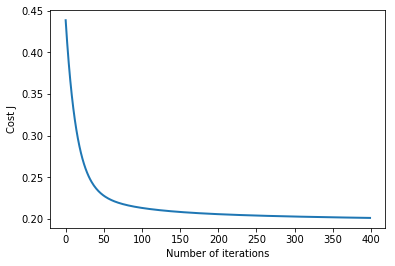

In [194]:
alpha = 0.01
num_iters = 400
theta_six = np.zeros(6)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:6], y_train, theta_six, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
thetatsix_trained=theta
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# ======================= YOUR CODE HERE ===========================
normalize_test_data = None
normalize_test_data = None
price = 0
# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2   -0.054645
3   -0.012427
4    0.222537
5    0.203186
6    0.279256
7    0.172610
8    0.137657
Name: 1, dtype: float64
[0.4378911026758181, 0.422940335269588, 0.4090213291006626, 0.3960611543380172, 0.38399206464102487, 0.37275112824189693, 0.362279885293831, 0.3525240296146609, 0.34343311308896773, 0.3349602711152992, 0.32706196760002415, 0.31969775810604684, 0.3128300698637078, 0.3064239974432427, 0.30044711297366067, 0.29486928987230954, 0.2896625391231404, 0.28480085721018533, 0.28026008487638265, 0.2760177759369709, 0.2720530754315607, 0.2683466064499637, 0.26488036501420703, 0.26163762244313155, 0.258602834666819, 0.2557615579960249, 0.2531003708870283, 0.2506068012750337, 0.24826925907965558, 0.24607697351424584, 0.2440199348570436, 0.24208884036648146, 0.24027504404559907, 0.23857050998152585, 0.23696776900550506, 0.23545987843705507, 0.23404038469269675, 0.23270328855530983, 0.2314430129147009, 0.23025437280345423, 0.22913254756466211, 

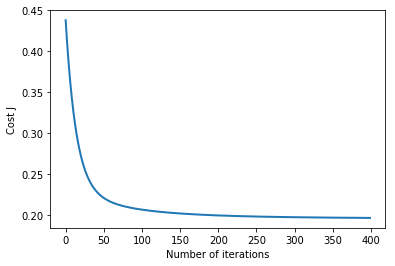

In [195]:
alpha = 0.01
num_iters = 400
theta_seven = np.zeros(7)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:7], y_train, theta_seven, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
thetatseven_trained=theta
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# ======================= YOUR CODE HERE ===========================
normalize_test_data = None
normalize_test_data = None
price = 0
# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2   -0.047353
3   -0.001446
4    0.219180
5    0.212388
6    0.245582
7    0.182513
8    0.113168
9    0.245506
Name: 1, dtype: float64
[0.436983880540573, 0.4211623343945294, 0.40640694556135276, 0.3926428763902782, 0.3798006020298328, 0.36781553207818674, 0.3566276592015947, 0.34618123279819596, 0.3364244559215361, 0.327309203805495, 0.318790762450542, 0.3108275858410527, 0.3033810704654002, 0.29641534590524177, 0.2898970803483781, 0.28379529996124625, 0.27808122113296574, 0.2727280946733101, 0.26771106111240006, 0.26300701631068146, 0.25859448664417456, 0.2544535130823933, 0.25056554352499716, 0.24691333280844213, 0.2434808498358688, 0.2402531913224526, 0.23721650168464312, 0.2343578986353407, 0.23166540407828645, 0.22912787992393593, 0.22673496847602218, 0.22447703706302066, 0.22234512661195807, 0.22033090388357732, 0.2184266171079038, 0.21662505477786445, 0.2149195073758863, 0.2133037318244504, 0.2117719184664772, 0.21031866039525968, 0.208938

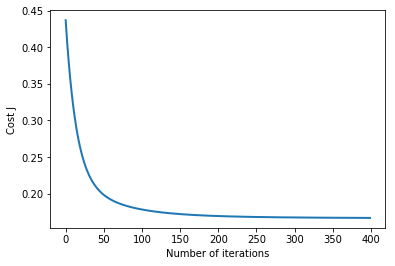

In [196]:
alpha = 0.01
num_iters = 400
theta_eight = np.zeros(8)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:8], y_train, theta_eight, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
thetateight_trained=theta
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# ======================= YOUR CODE HERE ===========================
normalize_test_data = None
normalize_test_data = None
price = 0
# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2    -0.044472
3    -0.001246
4     0.193463
5     0.202376
6     0.213564
7     0.155047
8     0.110734
9     0.244327
10    0.098469
Name: 1, dtype: float64
[0.43390568542822744, 0.4154568891374885, 0.3984741253876739, 0.38283669922697827, 0.3684339384824841, 0.35516435967111554, 0.3429349033598425, 0.3316602331917624, 0.32126209327631566, 0.31166871908340404, 0.3028142973859327, 0.29463847116633307, 0.28708588574277083, 0.2801057726825517, 0.2736515683560916, 0.26768056424685555, 0.26215358637289293, 0.2570347013958101, 0.2522909471948978, 0.2478920858691959, 0.24381037729992883, 0.2400203715612696, 0.23649871860996355, 0.2332239938150401, 0.23017653800865834, 0.22733831084896575, 0.22469275638654237, 0.2222246798183059, 0.21992013449737, 0.21776631834492183, 0.21575147888129237, 0.21386482615858587, 0.21209645293699075, 0.21043726150168285, 0.20887889656744882, 0.20741368376419922, 0.2060345732387451, 0.2047350879469026, 0.20350927624545717, 0.

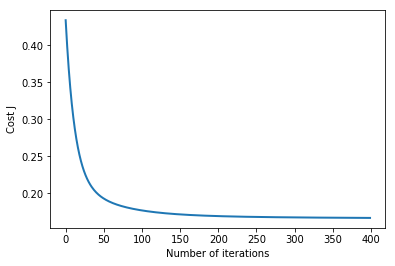

In [198]:
alpha = 0.01
num_iters = 400
theta_nine = np.zeros(9)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:9], y_train, theta_nine, alpha, num_iters)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
thetatnine_trained=theta
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# ======================= YOUR CODE HERE ===========================
normalize_test_data = None
normalize_test_data = None
price = 0
# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

In [204]:
j1=computeCostMulti(X_val.iloc[:,0:1], y_val, thetaone_trained)
j2=computeCostMulti(X_val.iloc[:,0:2], y_val, thetatwo_trained)
j3=computeCostMulti(X_val.iloc[:,0:3], y_val, thetathree_trained)
j4=computeCostMulti(X_val.iloc[:,0:4], y_val, thetatfour_trained)
j5=computeCostMulti(X_val.iloc[:,0:5], y_val, thetatfive_trained)
j6=computeCostMulti(X_val.iloc[:,0:6], y_val, thetatsix_trained)
j7=computeCostMulti(X_val.iloc[:,0:7], y_val, thetatseven_trained)
j8=computeCostMulti(X_val.iloc[:,0:8], y_val, thetateight_trained)
j9=computeCostMulti(X_val.iloc[:,0:9], y_val, thetatnine_trained)
print ('j1=',j1)
print ('j2=',j2)
print ('j3=',j3)
print ('j4=',j4)
print ('j5=',j5)
print ('j6=',j6)
print ('j7=',j7)
print ('j8=',j8)
print ('j9=',j9)

j1= 0.5075982761975284
j2= 0.39679672737513844
j3= 0.2814188086043088
j4= 0.26211231621121117
j5= 0.24415756894579493
j6= 0.24579711213365488
j7= 0.24124551227982943
j8= 0.20888392808636239
j9= 0.210294906204049


In [205]:
j_general=computeCostMulti(X_test.iloc[:,0:8], y_test, thetateight_trained)
print ('j_general',j_general)

j_general 0.2091026437820602
